<a href="https://colab.research.google.com/github/siddhanttt24/Spotify-Dashboard-using-PowerBI/blob/main/housingprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#read the dataset
housing = pd.read_csv(r"housing.csv")
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
housing.nunique()

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64

In [6]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

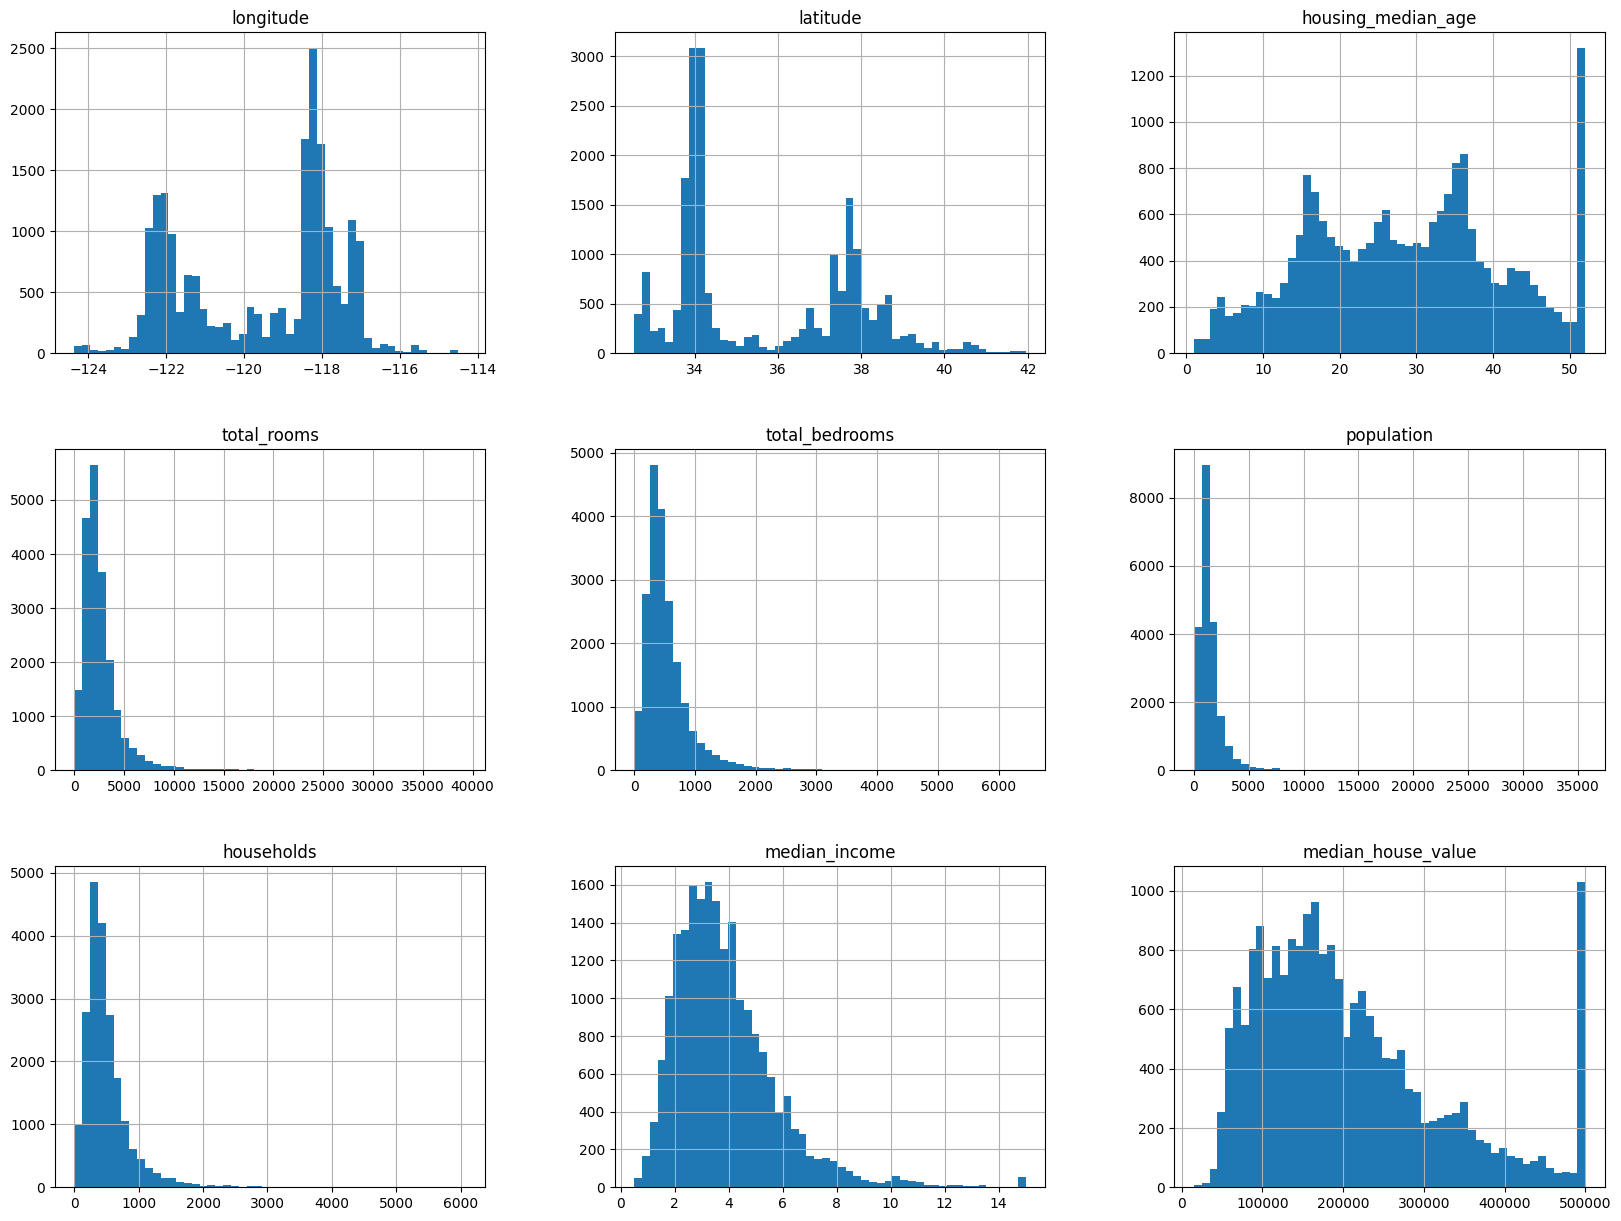

In [7]:
housing.hist(bins=50,figsize=(20,15))

<Axes: >

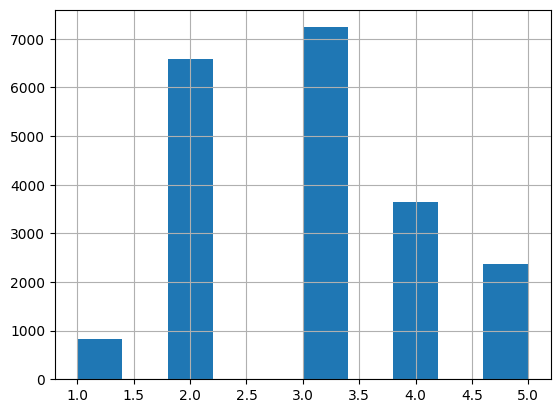

In [8]:
housing['income_category'] = pd.cut(housing['median_income'], bins = [0,1.5,3,4.5,6, np.inf], labels=[1,2,3,4,5])

housing['income_category'].hist()

In [9]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

<Axes: >

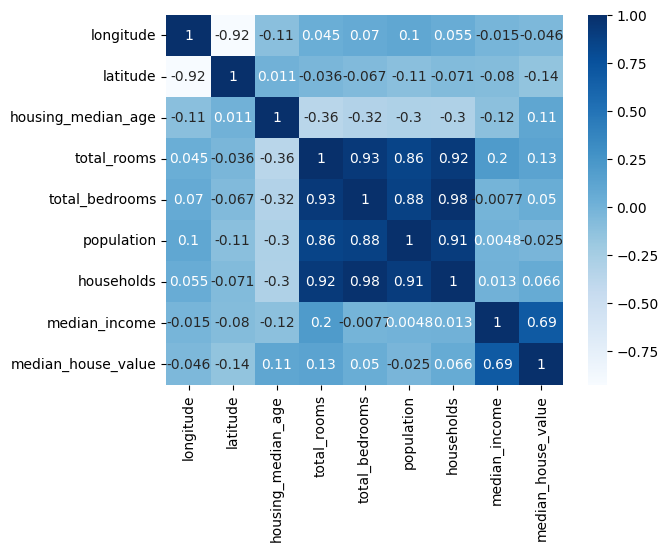

In [10]:
sns.heatmap(corr_matrix,annot=True,cmap='Blues')

In [11]:
housing_eda = housing.copy()


In [12]:
housing_eda['rooms_per_household'] = housing_eda['total_rooms'] / housing_eda['households']
housing_eda['bedrooms_per_room'] = housing_eda['total_bedrooms'] / housing_eda['total_rooms']
housing_eda['population_per_houshold'] = housing_eda['population'] / housing_eda['households']

In [14]:
from sklearn.model_selection import train_test_split

x = housing.drop(columns='median_house_value')
y = housing['median_house_value']

X_train,X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2)

In [21]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributeAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True, add_rooms_per_household=True, add_population_per_household=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        self.add_rooms_per_household = add_rooms_per_household
        self.add_population_per_household = add_population_per_household
    def fit(self, X, y=None):
        return self
    def transform(self,X, y=None):
        if self.add_bedrooms_per_room==1:
            bedrooms_per_room=X[:, bedrooms_ix] / X[:, rooms_ix]
            bedrooms_per_room=np.log(bedrooms_per_room+1)
            X=np.c_[X, bedrooms_per_room]
        if self.add_rooms_per_household==1:
            rooms_per_household=X[:, rooms_ix] / X[:, households_ix]
            rooms_per_household=np.log(rooms_per_household+1)
            X=np.c_[X, rooms_per_household]
        if self.add_population_per_household==1:
            population_per_household=X[:, population_ix] / X[:, households_ix]
            population_per_household=np.log(population_per_household+1)
            X=np.c_[X, population_per_household]
            X[rooms_ix]=np.log(X[rooms_ix]+1)
            X[bedrooms_ix]=np.log(X[bedrooms_ix]+1)
            X[population_ix]=np.log(X[population_ix]+1)
            X[households_ix]=np.log(X[households_ix]+1)
        return X

In [22]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline= Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attrib_adder', CombinedAttributeAdder(add_bedrooms_per_room=True, add_rooms_per_household=True, add_population_per_household=False)),
    ('std_scaler', StandardScaler()),
])

In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
num_attribs = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_attribs=['ocean_proximity']
full_pipline=ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])
processed_X_train=full_pipline.fit_transform(X_train)
processed_X_test =full_pipline.transform(X_test)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
reg=LinearRegression()
reg.fit(processed_X_train, Y_train)


scores = cross_val_score(reg,processed_X_train,Y_train, scoring='neg_mean_squared_error',cv=10)
print('cross validation scores :',np.sqrt(-scores).mean(),'\n')

cross validation scores : 68520.59062673071 



In [28]:
from sklearn.metrics import accuracy_score

train_score = reg.score(processed_X_train,Y_train)
test_score = reg.score(processed_X_test,Y_test)

print('Linear regression score: \n')
print('Train score : ',round(train_score*100),'%')
print('Test score : ',round(test_score*100),'%')

Linear regression score: 

Train score :  65 %
Test score :  65 %


In [29]:
train_score = forest_reg.score(processed_X_train,Y_train)
test_score = forest_reg.score(processed_X_test,Y_test)

print('Random forest score : \n')
print('Train score : ',round(train_score*100),'%')
print('Test score : ',round(test_score*100),'%')

Random forest score : 

Train score :  98 %
Test score :  81 %
